In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
#Load Training Data
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)

In [3]:
#Load Validate data
with open("traffic-signs-data/valid.p", mode="rb") as valid_data:
    valid = pickle.load(valid_data)

In [4]:
# Load Test Data
with open("traffic-signs-data/test.p", mode="rb") as test_data:
    test = pickle.load(test_data)

In [5]:
# Split to train  Features and Labels 
x_train, y_train = train["features"],train["labels"]

In [6]:
x_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
# Split to valid featues and labels 
x_val, y_val = valid["features"],valid["labels"]

In [9]:
# split to test features and labels
x_test, y_test = test["features"], test["labels"]

In [10]:
x_test.shape

(12630, 32, 32, 3)

#image check

23

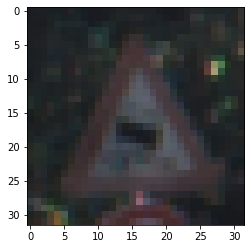

In [12]:
i = 2000
plt.imshow(x_train[i])
y_train[i]

31

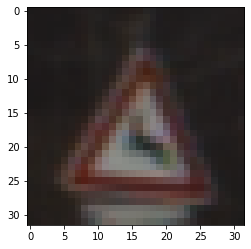

In [13]:
i = 100
plt.imshow(x_val[i])
y_val[i]

4


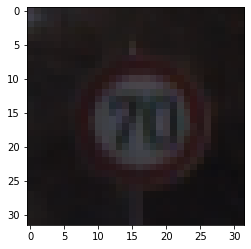

In [14]:
i= 20
plt.imshow(x_test[i])
print(y_test[i])

#Data Normalization

In [15]:
from sklearn.utils import shuffle

In [16]:
#shuffle data
x_train,y_train = shuffle(x_train, y_train)

In [17]:
#Grayscale 
x_train_gray = np.sum(x_train/3, axis = 3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims=True)
x_validation_gray = np.sum(x_val/3, axis = 3, keepdims=True)

In [18]:
x_train_gray.shape

(34799, 32, 32, 1)

In [19]:
x_test_gray.shape

(12630, 32, 32, 1)

In [20]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [21]:
#Normalize data 

In [22]:
x_train_gray_norm = (x_train_gray - 28) / 128
x_test_gray_norm = (x_test_gray - 128) / 128
x_validation_gray_norm = ( x_validation_gray - 128) / 128

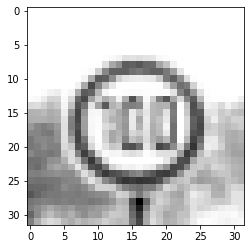

In [23]:
i = 10
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')


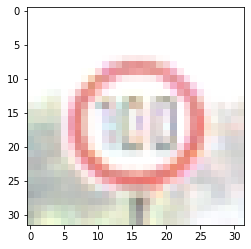

In [24]:
plt.imshow(x_train[i])

#Preparing models 
. Step 1: The First Convolutional Layer #1
 # Input = 32 * 32 * 1
 . Output = 28 * 28 * 6
 . Output = ( input - filter + 1)/stride = (32-5+1)/1 = 28
 . Filter 5 * 5 with input depth of 3 and output depth of 6
 . Apply RELU Activation function to the output
 . Pooling for input, input = 28*28*6 and output = 14*14*6
 
 . Stride is the amount by which the kernel is shifted when the kernel is passed over the image 

In [66]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [67]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation='relu'))
cnn_model.add(Dense(units = 84, activation='relu'))
#activation softmax becase its categorical
cnn_model.add(Dense(units = 43, activation='softmax'))


In [68]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [69]:
history =cnn_model.fit(x_train_gray_norm, 
             y_train, 
             batch_size= 500, 
             epochs= 100,
             verbose=1, 
             validation_data=(x_validation_gray_norm, y_val))

Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 10s 292us/step - loss: 3.0742 - accuracy: 0.2166 - val_loss: 2.8527 - val_accuracy: 0.2374
Epoch 2/100
34799/34799 [==============================] - 10s 278us/step - loss: 1.4079 - accuracy: 0.6119 - val_loss: 2.0614 - val_accuracy: 0.4490
Epoch 3/100
34799/34799 [==============================] - 9s 271us/step - loss: 0.8224 - accuracy: 0.7754 - val_loss: 1.7648 - val_accuracy: 0.5340
Epoch 4/100
34799/34799 [==============================] - 11s 325us/step - loss: 0.6132 - accuracy: 0.8332 - val_loss: 1.5320 - val_accuracy: 0.5887
Epoch 5/100
34799/34799 [==============================] - 14s 388us/step - loss: 0.4924 - accuracy: 0.8693 - val_loss: 1.3340 - val_accuracy: 0.6327
Epoch 6/100
34799/34799 [==============================] - 12s 340us/step - loss: 0.4097 - accuracy: 0.8954 - val_loss: 1.3519 - val_accuracy: 0.6383
Epoch 7/100
34799/34799 [===========================

In [29]:
score = cnn_model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 2s 134us/step
Test Accuracy: 0.5361837148666382


In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

In [37]:
epochs = range(len(accuracy))

Text(0.5, 1.0, 'Training and Validation Accuracy')

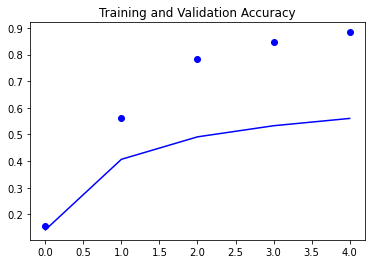

In [41]:
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'val_accuracy')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation loss')

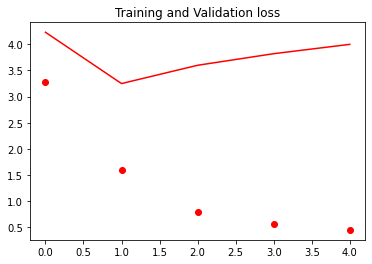

In [42]:
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.title('Training and Validation loss')

In [43]:
predicted_classess = cnn_model.predict_classes(x_test_gray_norm)

In [45]:
y_true = y_test

In [46]:
y_true

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [48]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_true, predicted_classess)

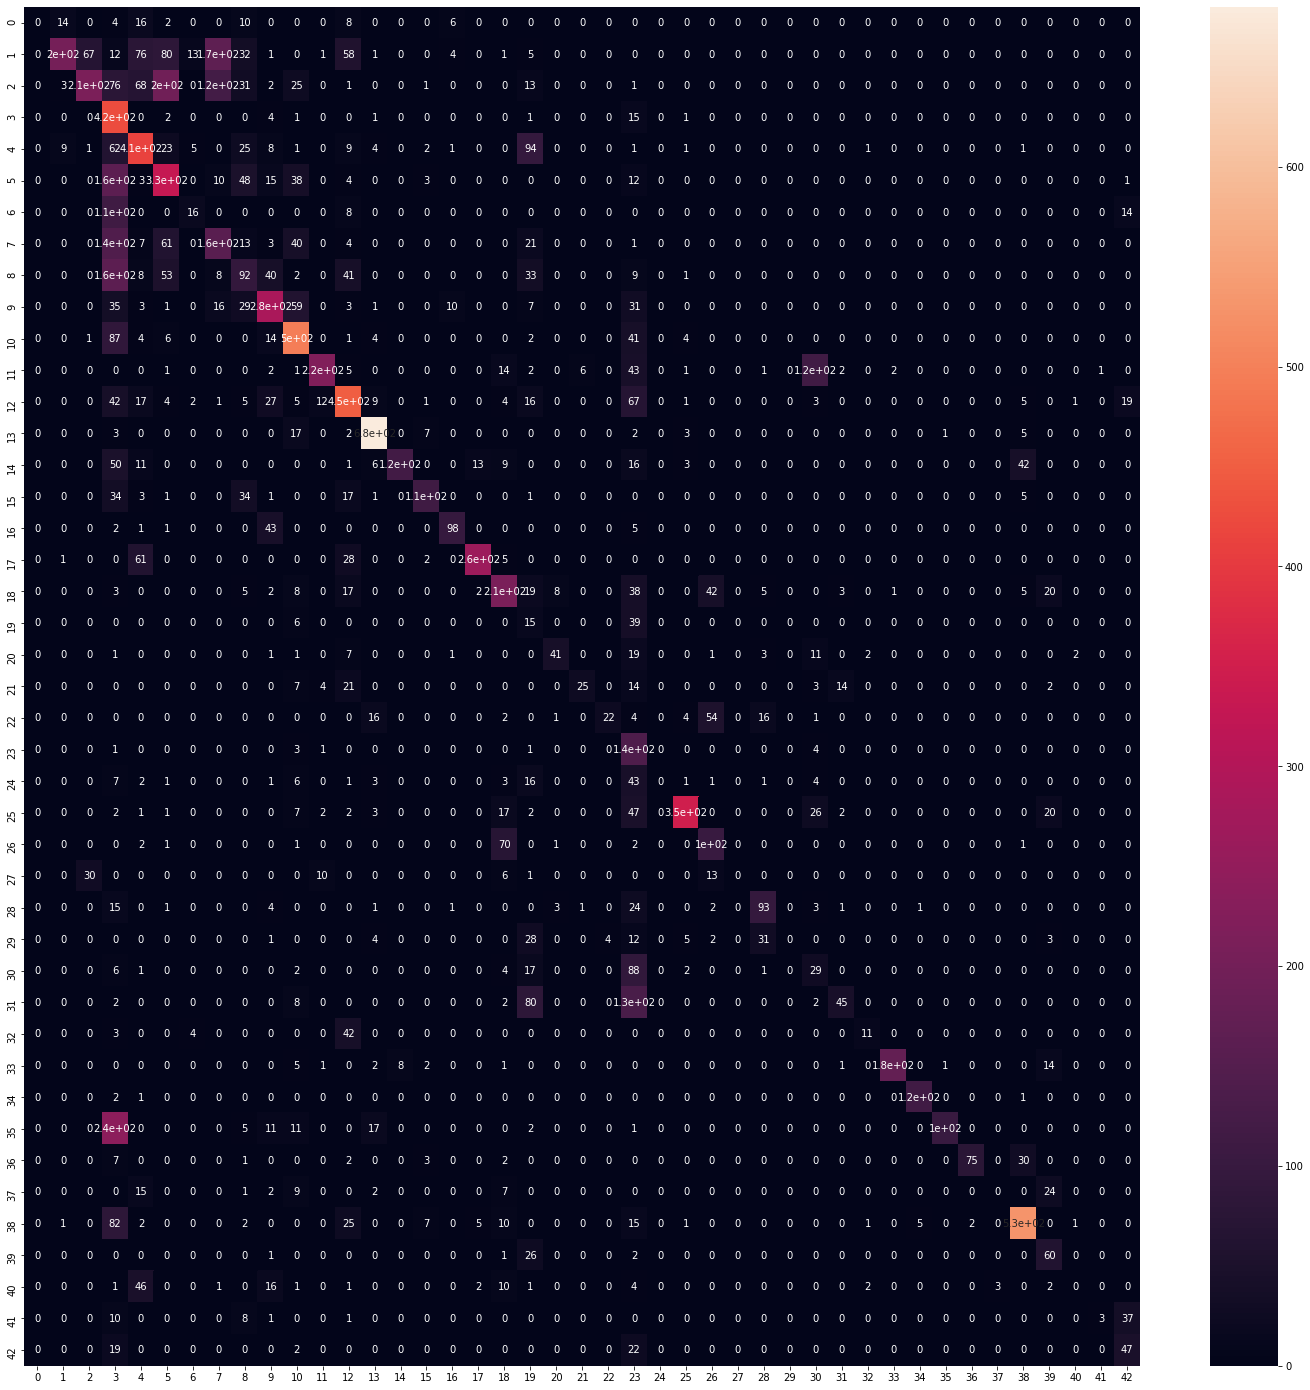

In [56]:
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

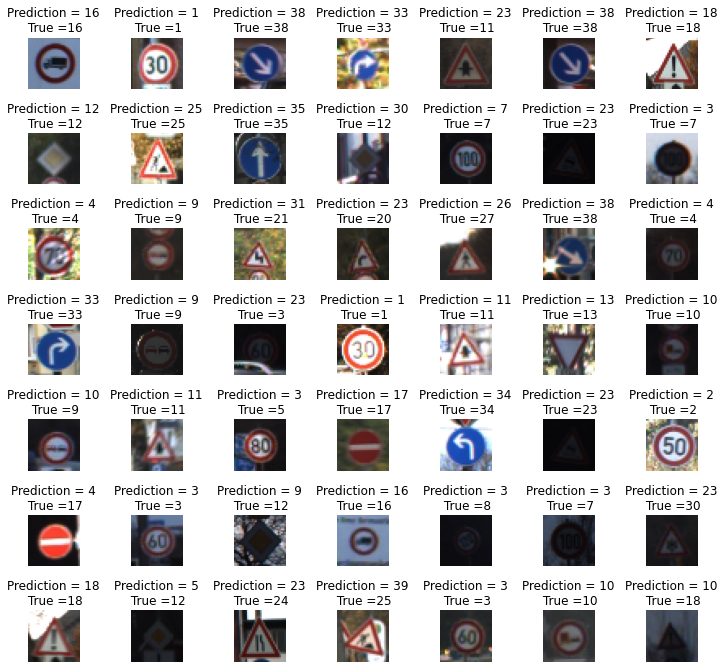

In [64]:
L = 7
W = 7

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True ={}'.format(predicted_classess[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

    